Разберёмся как применять object detection с pytorch

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

Берём Faster RCNN, т.к. она уже лежит в pytorch. Используем pretrained вариант

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/zizitopa/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


Указываем откуда брать картинку

In [5]:
img_path = '/home/zizitopa/Загрузки/cat.jpeg'

Специально не использую opencv, будем в этом примере работать только с matplotlib.

In [7]:
import matplotlib.pyplot as plt

In [8]:
image = plt.imread(img_path)

In [10]:
type(image)

numpy.ndarray

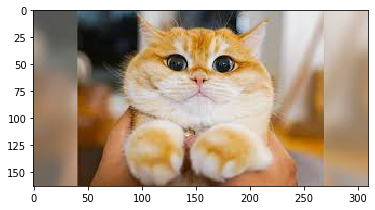

In [35]:
plt.imshow(image)

Теперь нужно перевести картинку в тензор. сейчас она у нас в виде np array

In [12]:
import torch
tensor_image = torch.tensor(image)

/opt/conda/conda-bld/pytorch_1591914855613/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [14]:
tensor_image.shape

torch.Size([163, 310, 3])

На вход модель ждёт тензор в формате C, H, W. А у нас каналы очевидно в конце находятся, поэтому поменяем местами эти "столбцы"

In [24]:
tensor_image = tensor_image.permute(2, 0, 1)
tensor_image.shape

torch.Size([3, 163, 310])

Также моделька ждёт, что значения будут в отрезке [0,1]. Поэтому просто делим всё на 255

In [28]:
img_01 = tensor_image / 255.
img_01

tensor([[[0.3451, 0.3451, 0.3451,  ..., 0.8157, 0.8196, 0.8275],
         [0.3451, 0.3451, 0.3451,  ..., 0.8157, 0.8235, 0.8275],
         [0.3451, 0.3451, 0.3451,  ..., 0.8196, 0.8235, 0.8275],
         ...,
         [0.4510, 0.4510, 0.4510,  ..., 0.6902, 0.6902, 0.6941],
         [0.4510, 0.4510, 0.4510,  ..., 0.6902, 0.6902, 0.6941],
         [0.4510, 0.4510, 0.4510,  ..., 0.6902, 0.6902, 0.6941]],

        [[0.3412, 0.3412, 0.3412,  ..., 0.7647, 0.7686, 0.7765],
         [0.3412, 0.3412, 0.3412,  ..., 0.7647, 0.7725, 0.7765],
         [0.3412, 0.3412, 0.3412,  ..., 0.7686, 0.7725, 0.7765],
         ...,
         [0.3961, 0.3961, 0.3961,  ..., 0.6353, 0.6353, 0.6392],
         [0.3961, 0.3961, 0.3961,  ..., 0.6353, 0.6353, 0.6392],
         [0.3961, 0.3961, 0.3961,  ..., 0.6353, 0.6353, 0.6392]],

        [[0.3333, 0.3333, 0.3333,  ..., 0.7412, 0.7451, 0.7529],
         [0.3333, 0.3333, 0.3333,  ..., 0.7412, 0.7490, 0.7529],
         [0.3333, 0.3333, 0.3333,  ..., 0.7451, 0.7490, 0.

Ну и наконец переводим модель в eval режим и подсовываем ей наш тензор. Модель работает с батчами, а у нас только одна картинка. можно либо сделать unsqueeze и растянуть её по первому измерению, либо просто сунуть в список.

In [29]:
model.eval()
predictions = model([img_01])

/home/zizitopa/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/conda-bld/pytorch_1591914855613/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


А теперь можно посмотреть что она тут напредсказывала

In [30]:
predictions

[{'boxes': tensor([[ 60.9110,   7.4761, 227.5999, 138.1239],
          [ 61.9177,   7.2157, 233.1273, 145.5882],
          [147.5540, 106.2044, 207.4831, 155.7809],
          [ 85.2527, 100.6074, 144.1390, 161.4112],
          [ 40.7444,   0.5244, 112.9301,  54.6071],
          [134.0097, 109.4640, 152.4260, 157.2140],
          [ 40.9164,  61.3611,  85.3326, 137.9798],
          [220.1631,  63.2218, 233.6893, 111.8406],
          [219.3361,  51.3173, 268.1358, 131.5828],
          [ 58.4845,  97.0548, 148.9651, 162.5547],
          [ 83.2807, 102.4412, 146.6833, 161.6152],
          [218.1488,  53.7611, 267.0027, 127.8377],
          [150.2651, 107.8372, 202.1622, 135.9843],
          [132.3845,  77.7606, 168.1652, 113.0413],
          [127.8272,  79.7794, 167.9983, 111.2837],
          [139.7096, 110.1346, 152.6539, 130.1010],
          [ 58.2084,  21.7134, 236.9133, 153.8924],
          [ 41.6437,  60.9674,  85.7351, 133.1808],
          [136.9999, 104.3924, 249.6761, 161.6844],
   

Посмотрим бокс по которому самая высокая уверенность у модели (они отсортированы по убыванию)

In [31]:
image.shape

(163, 310, 3)

На копии изначального рисунка руками нарисуем прямоугольник

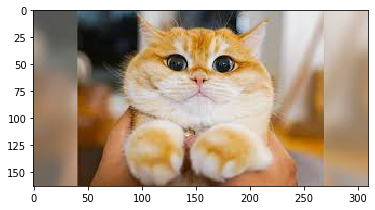

In [33]:
import copy
w = 5
my_image = copy.copy(image)
plt.imshow(my_image)


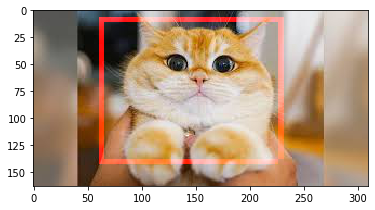

In [34]:
my_image[7:138, 61:61+w, 0] = 255
my_image[7:138, 227:227+w, 0] = 255
my_image[7:7+w, 61:227, 0] = 255
my_image[138:138+w, 61:227, 0] = 255
plt.imshow(my_image)